<a href="https://colab.research.google.com/github/kjrobinson29/ITAI_ML_FirstRepo_Kendrick_Robinson/blob/main/04_Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis (EDA) and Data Visualization
## Module 4, Lab 2: Understanding Your Data

Exploratory Data Analysis (EDA) is one of the most critical steps in any machine learning project. Before building models, you need to understand your data thoroughly. This lab will teach you how to explore datasets, identify patterns, and create meaningful visualizations.

### Learning Objectives
By the end of this lab, you will be able to:
- Load and examine datasets using pandas
- Identify data quality issues (missing values, duplicates, outliers)
- Calculate and interpret summary statistics
- Create effective visualizations using matplotlib and seaborn
- Draw insights from data exploration

### Business Problem
We'll analyze a customer dataset to understand purchasing behavior and demographics. This type of analysis helps businesses make data-driven decisions about marketing, product development, and customer segmentation.

## Setup and Data Loading

In [26]:
pip install matplotlib pandas seaborn numpy

In [1]:
# Install required packages
!pip install --upgrade pip
!pip install pandas numpy matplotlib seaborn plotly

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 13.8 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2


In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
%matplotlib inline

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

print("Libraries imported successfully!")

Libraries imported successfully!


### Loading the Dataset
We'll create a realistic customer dataset for our analysis.

In [3]:
# Create a synthetic customer dataset
np.random.seed(42)
n_customers = 1000

# Generate customer data
customer_data = {
    'customer_id': range(1, n_customers + 1),
    'age': np.random.normal(40, 15, n_customers).astype(int),
    'gender': np.random.choice(['Male', 'Female', 'Other'], n_customers, p=[0.48, 0.50, 0.02]),
    'income': np.random.lognormal(10.5, 0.5, n_customers),
    'education': np.random.choice(['High School', 'Bachelor', 'Master', 'PhD'],
                                 n_customers, p=[0.3, 0.4, 0.25, 0.05]),
    'city_tier': np.random.choice(['Tier 1', 'Tier 2', 'Tier 3'],
                                 n_customers, p=[0.3, 0.4, 0.3]),
    'years_as_customer': np.random.exponential(3, n_customers),
    'total_purchases': np.random.poisson(12, n_customers),
    'avg_order_value': np.random.gamma(2, 50, n_customers),
    'satisfaction_score': np.random.normal(7.5, 1.5, n_customers)
}

# Create DataFrame
df = pd.DataFrame(customer_data)

# Add some realistic constraints
df['age'] = np.clip(df['age'], 18, 80)
df['income'] = np.clip(df['income'], 20000, 200000)
df['years_as_customer'] = np.clip(df['years_as_customer'], 0, 15)
df['satisfaction_score'] = np.clip(df['satisfaction_score'], 1, 10)

# Calculate total spending
df['total_spending'] = df['total_purchases'] * df['avg_order_value']

# Introduce some missing values (realistic scenario)
missing_indices = np.random.choice(df.index, size=50, replace=False)
df.loc[missing_indices, 'satisfaction_score'] = np.nan

# Add some duplicates (data quality issue)
duplicate_rows = df.sample(5).copy()
df = pd.concat([df, duplicate_rows], ignore_index=True)

print(f"Dataset created with {len(df)} customers")
print(f"Dataset shape: {df.shape}")

Dataset created with 1005 customers
Dataset shape: (1005, 11)


## Step 1: Initial Data Exploration
Let's start by getting familiar with our dataset.

In [4]:
# Display first few rows
print("First 5 rows of the dataset:")
display(df.head())

print("\nLast 5 rows of the dataset:")
display(df.tail())

First 5 rows of the dataset:


,customer_id,age,gender,income,education,city_tier,years_as_customer,total_purchases,avg_order_value,satisfaction_score,total_spending
0,1,47,Male,31113.449406,High School,Tier 2,0.471771,12,58.249722,9.076161,698.996661
1,2,37,Male,24932.359005,Bachelor,Tier 2,6.289826,22,39.964016,6.902278,879.208350
2,3,49,Female,42599.051008,Bachelor,Tier 1,2.253532,12,56.137914,5.812590,673.654965
3,4,62,Female,70985.096321,High School,Tier 1,1.889171,13,80.487029,6.999362,1046.331379
4,5,36,Male,20000.000000,High School,Tier 1,0.338538,8,84.832080,8.859273,678.656638



Last 5 rows of the dataset:


,customer_id,age,gender,income,education,city_tier,years_as_customer,total_purchases,avg_order_value,satisfaction_score,total_spending
1000,935,46,Female,96478.813777,Master,Tier 2,3.218394,11,137.763089,9.208171,1515.393977
1001,644,18,Male,30728.977611,Bachelor,Tier 3,1.151774,12,92.621642,NaN,1111.459705
1002,810,26,Male,20000.000000,Bachelor,Tier 2,0.227681,11,42.907979,2.973530,471.987767
1003,286,18,Male,67377.429094,Bachelor,Tier 1,1.771158,8,31.961654,7.293824,255.693232
1004,22,36,Female,46833.896860,Bachelor,Tier 2,3.994514,11,42.648150,8.604621,469.129645


In [5]:
# Get basic information about the dataset
print("Dataset Info:")
print(df.info())

print("\nDataset Shape:")
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")

print("\nColumn Names:")
print(df.columns.tolist())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1005 entries, 0 to 1004
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_id         1005 non-null   int64  
 1   age                 1005 non-null   int64  
 2   gender              1005 non-null   object 
 3   income              1005 non-null   float64
 4   education           1005 non-null   object 
 5   city_tier           1005 non-null   object 
 6   years_as_customer   1005 non-null   float64
 7   total_purchases     1005 non-null   int64  
 8   avg_order_value     1005 non-null   float64
 9   satisfaction_score  954 non-null    float64
 10  total_spending      1005 non-null   float64
dtypes: float64(5), int64(3), object(3)
memory usage: 86.5+ KB
None

Dataset Shape:
Rows: 1005, Columns: 11

Column Names:
['customer_id', 'age', 'gender', 'income', 'education', 'city_tier', 'years_as_customer', 'total_purchases', 'avg_order

In [6]:
# Check data types
print("Data Types:")
print(df.dtypes)

print("\nNumerical Columns:")
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print(numerical_cols)

print("\nCategorical Columns:")
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print(categorical_cols)

Data Types:
customer_id             int64
age                     int64
gender                 object
income                float64
education              object
city_tier              object
years_as_customer     float64
total_purchases         int64
avg_order_value       float64
satisfaction_score    float64
total_spending        float64
dtype: object

Numerical Columns:
['customer_id', 'age', 'income', 'years_as_customer', 'total_purchases', 'avg_order_value', 'satisfaction_score', 'total_spending']

Categorical Columns:
['gender', 'education', 'city_tier']


## Step 2: Data Quality Assessment
Before analyzing the data, we need to identify and understand data quality issues.

In [7]:
# Check for missing values
print("Missing Values:")
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing Count': missing_data,
    'Missing Percentage': missing_percent
})
missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values('Missing Count', ascending=False)
print(missing_df)

Missing Values:
                    Missing Count  Missing Percentage
satisfaction_score             51            5.074627


In [8]:
# Check for duplicate rows
print(f"Total rows: {len(df)}")
print(f"Unique rows: {len(df.drop_duplicates())}")
print(f"Duplicate rows: {len(df) - len(df.drop_duplicates())}")

if len(df) != len(df.drop_duplicates()):
    print("\nDuplicate rows found:")
    duplicates = df[df.duplicated(keep=False)]
    print(duplicates.sort_values('customer_id'))

Total rows: 1005
Unique rows: 1000
Duplicate rows: 5

Duplicate rows found:
      customer_id  age  gender        income education city_tier  \
21             22   36  Female  46833.896860  Bachelor    Tier 2   
1004           22   36  Female  46833.896860  Bachelor    Tier 2   
1003          286   18    Male  67377.429094  Bachelor    Tier 1   
285           286   18    Male  67377.429094  Bachelor    Tier 1   
643           644   18    Male  30728.977611  Bachelor    Tier 3   
1001          644   18    Male  30728.977611  Bachelor    Tier 3   
809           810   26    Male  20000.000000  Bachelor    Tier 2   
1002          810   26    Male  20000.000000  Bachelor    Tier 2   
934           935   46  Female  96478.813777    Master    Tier 2   
1000          935   46  Female  96478.813777    Master    Tier 2   

      years_as_customer  total_purchases  avg_order_value  satisfaction_score  \
21             3.994514               11        42.648150            8.604621   
1004         

In [9]:
# Check for outliers using IQR method
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

print("Outlier Detection (using IQR method):")
for col in ['age', 'income', 'total_spending']:
    outliers, lower, upper = detect_outliers(df, col)
    print(f"\n{col}:")
    print(f"  Normal range: {lower:.2f} to {upper:.2f}")
    print(f"  Number of outliers: {len(outliers)}")
    print(f"  Percentage of outliers: {len(outliers)/len(df)*100:.2f}%")

Outlier Detection (using IQR method):

age:
  Normal range: 1.50 to 77.50
  Number of outliers: 6
  Percentage of outliers: 0.60%

income:
  Normal range: -10132.92 to 87157.18
  Number of outliers: 36
  Percentage of outliers: 3.58%

total_spending:
  Normal range: -913.79 to 3050.00
  Number of outliers: 43
  Percentage of outliers: 4.28%


## Step 3: Summary Statistics
Let's calculate and interpret summary statistics for our numerical variables.

In [10]:
# Basic summary statistics
print("Summary Statistics for Numerical Variables:")
summary_stats = df.describe()
display(summary_stats.round(2))

Summary Statistics for Numerical Variables:


,customer_id,age,income,years_as_customer,total_purchases,avg_order_value,satisfaction_score,total_spending
count,1005.00,1005.00,1005.00,1005.00,1005.00,1005.00,954.00,1005.00
mean,500.69,40.10,41604.00,3.01,12.00,100.63,7.45,1194.66
std,289.10,13.89,20933.79,2.97,3.42,70.04,1.40,886.97
min,1.00,18.00,20000.00,0.01,3.00,1.11,2.97,8.90
25%,251.00,30.00,26350.87,0.82,10.00,50.63,6.52,572.63
50%,501.00,40.00,36443.98,2.08,12.00,84.02,7.44,964.52
75%,751.00,49.00,50673.39,4.27,14.00,133.65,8.44,1563.58
max,1000.00,80.00,174359.45,15.00,23.00,464.25,10.00,6268.79


In [11]:
# Additional statistics
print("Additional Statistics:")
additional_stats = pd.DataFrame({
    'Skewness': df[numerical_cols].skew(),
    'Kurtosis': df[numerical_cols].kurtosis(),
    'Variance': df[numerical_cols].var()
})
display(additional_stats.round(3))

Additional Statistics:


,Skewness,Kurtosis,Variance
customer_id,-0.002,-1.202,8.357904e+04
age,0.328,-0.391,1.928100e+02
income,1.938,6.351,4.382238e+08
years_as_customer,1.615,2.666,8.814000e+00
total_purchases,0.328,-0.035,1.168500e+01
avg_order_value,1.443,2.818,4.905801e+03
satisfaction_score,-0.237,-0.138,1.961000e+00
total_spending,1.606,3.718,7.867163e+05


In [12]:
# Summary for categorical variables
print("Summary for Categorical Variables:")
for col in categorical_cols:
    print(f"\n{col}:")
    value_counts = df[col].value_counts()
    percentages = df[col].value_counts(normalize=True) * 100
    summary = pd.DataFrame({
        'Count': value_counts,
        'Percentage': percentages
    })
    print(summary.round(2))

Summary for Categorical Variables:

gender:
        Count  Percentage
gender                   
Female    519       51.64
Male      465       46.27
Other      21        2.09

education:
             Count  Percentage
education                     
Bachelor       434       43.18
High School    309       30.75
Master         220       21.89
PhD             42        4.18

city_tier:
           Count  Percentage
city_tier                   
Tier 2       410       40.80
Tier 3       301       29.95
Tier 1       294       29.25


## Step 4: Data Visualization
Now let's create visualizations to better understand our data patterns.

### 4.1 Distribution of Numerical Variables

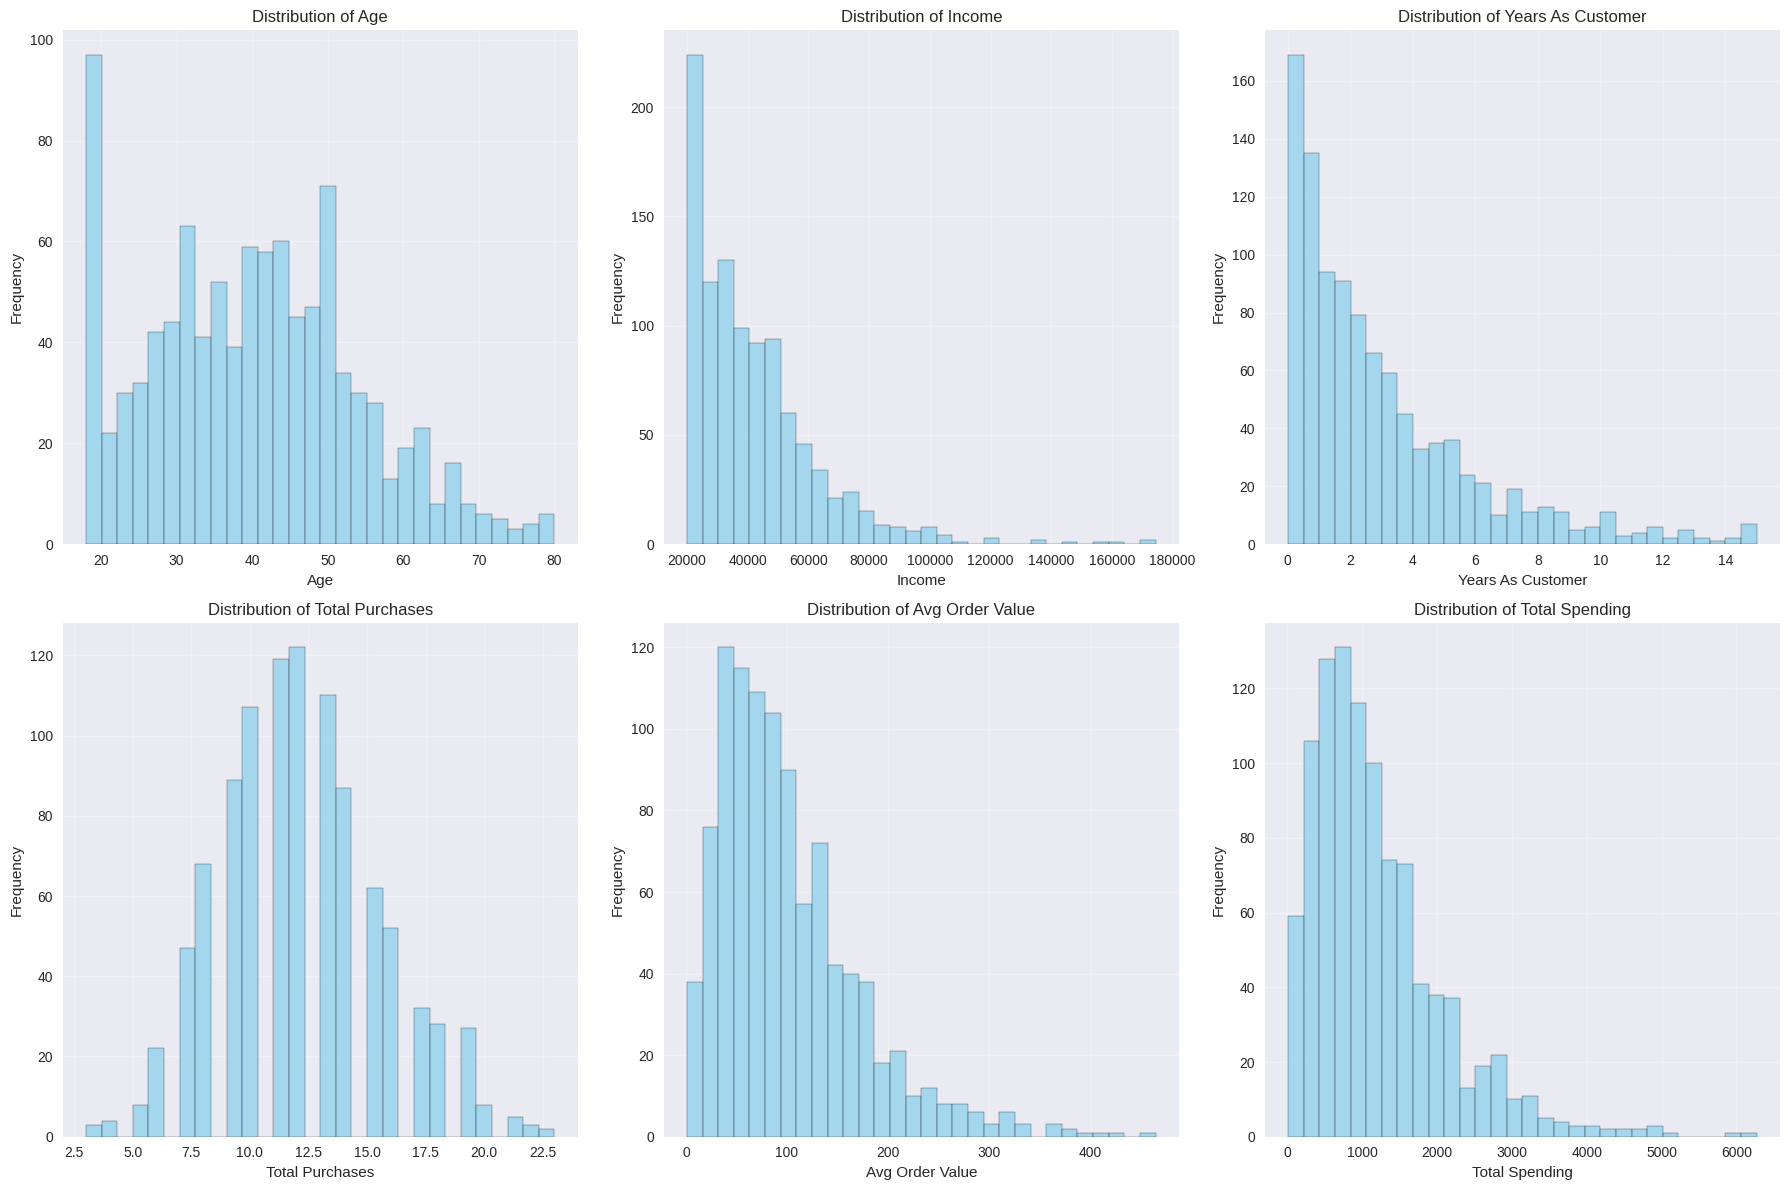

In [13]:
# Create histograms for numerical variables
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

numerical_vars = ['age', 'income', 'years_as_customer', 'total_purchases', 'avg_order_value', 'total_spending']

for i, var in enumerate(numerical_vars):
    axes[i].hist(df[var].dropna(), bins=30, alpha=0.7, color='skyblue', edgecolor='black')
    axes[i].set_title(f'Distribution of {var.replace("_", " ").title()}')
    axes[i].set_xlabel(var.replace("_", " ").title())
    axes[i].set_ylabel('Frequency')
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

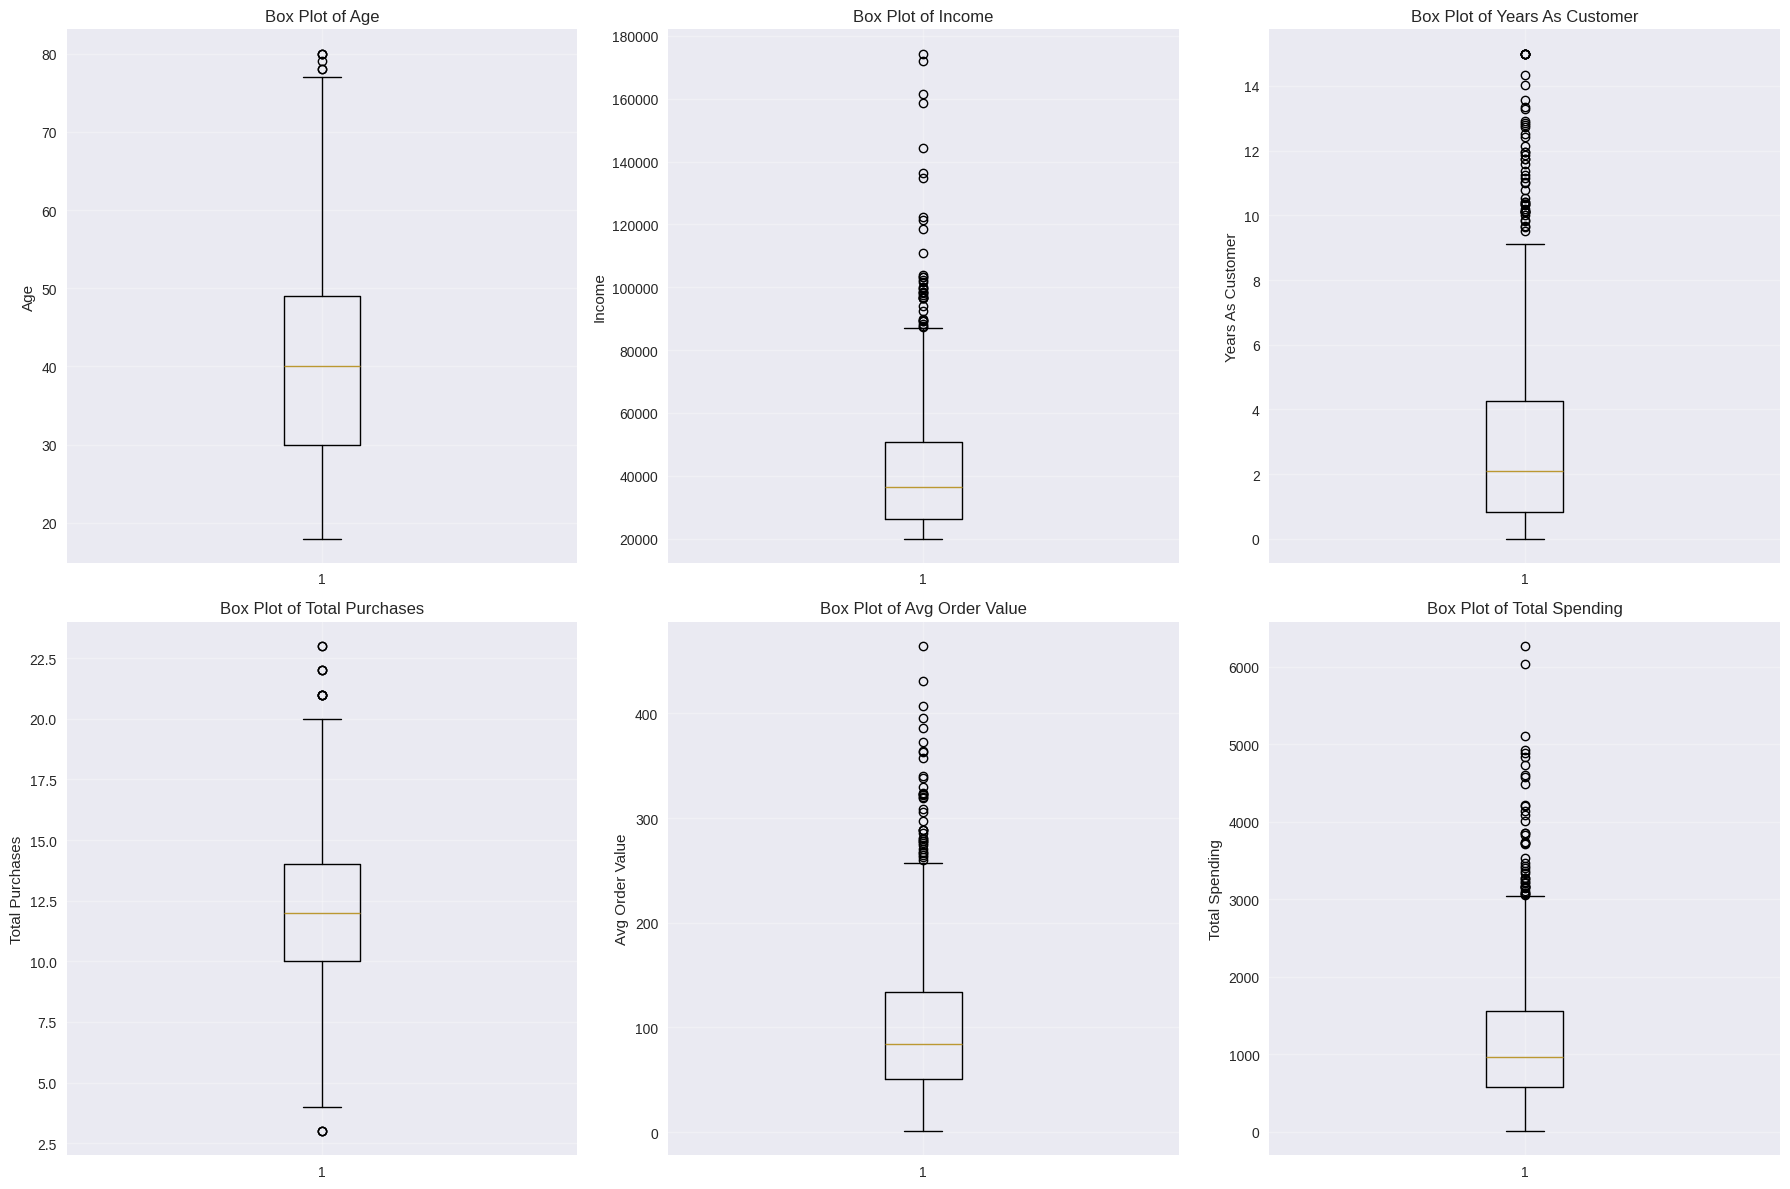

In [14]:
# Box plots to identify outliers
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

for i, var in enumerate(numerical_vars):
    axes[i].boxplot(df[var].dropna())
    axes[i].set_title(f'Box Plot of {var.replace("_", " ").title()}')
    axes[i].set_ylabel(var.replace("_", " ").title())
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### 4.2 Categorical Variable Analysis

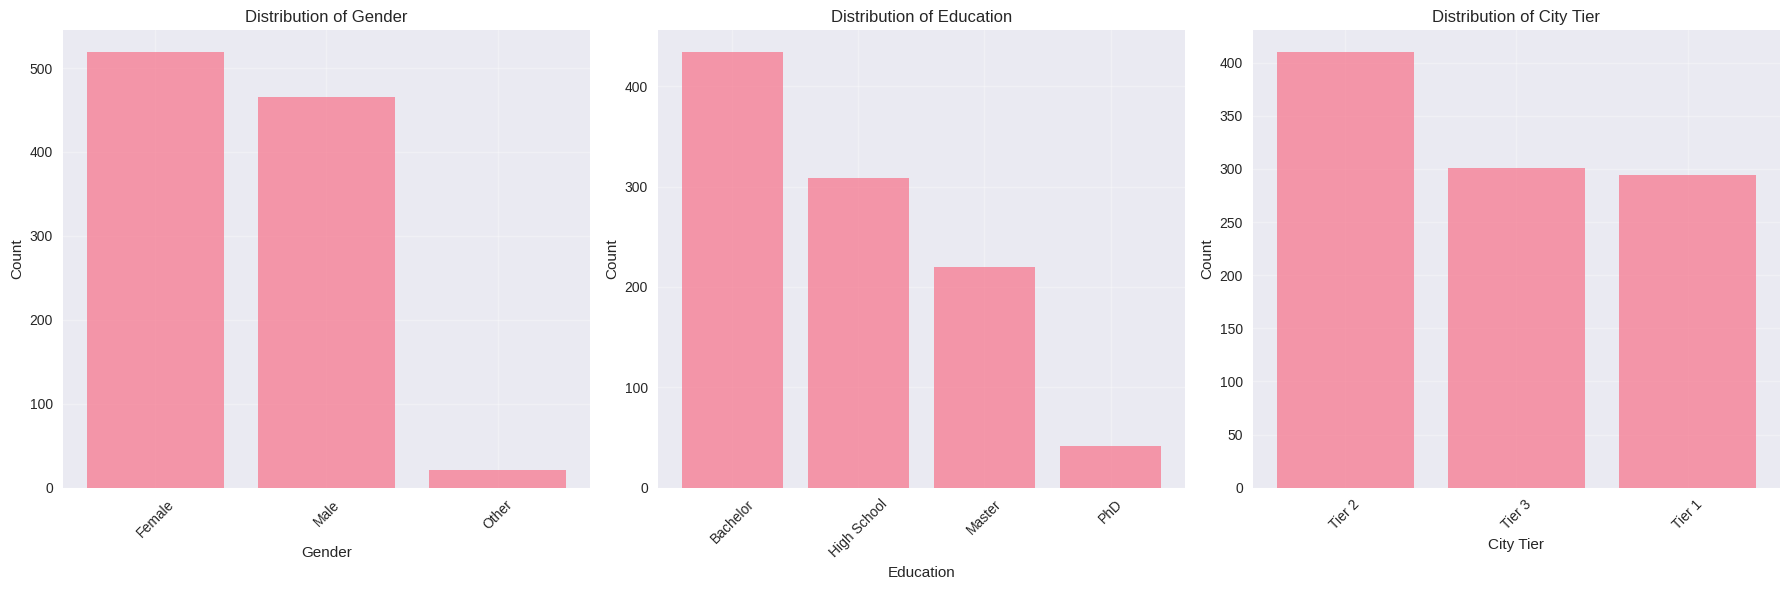

In [15]:
# Bar plots for categorical variables
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, var in enumerate(categorical_cols):
    value_counts = df[var].value_counts()
    axes[i].bar(value_counts.index, value_counts.values, alpha=0.7)
    axes[i].set_title(f'Distribution of {var.replace("_", " ").title()}')
    axes[i].set_xlabel(var.replace("_", " ").title())
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

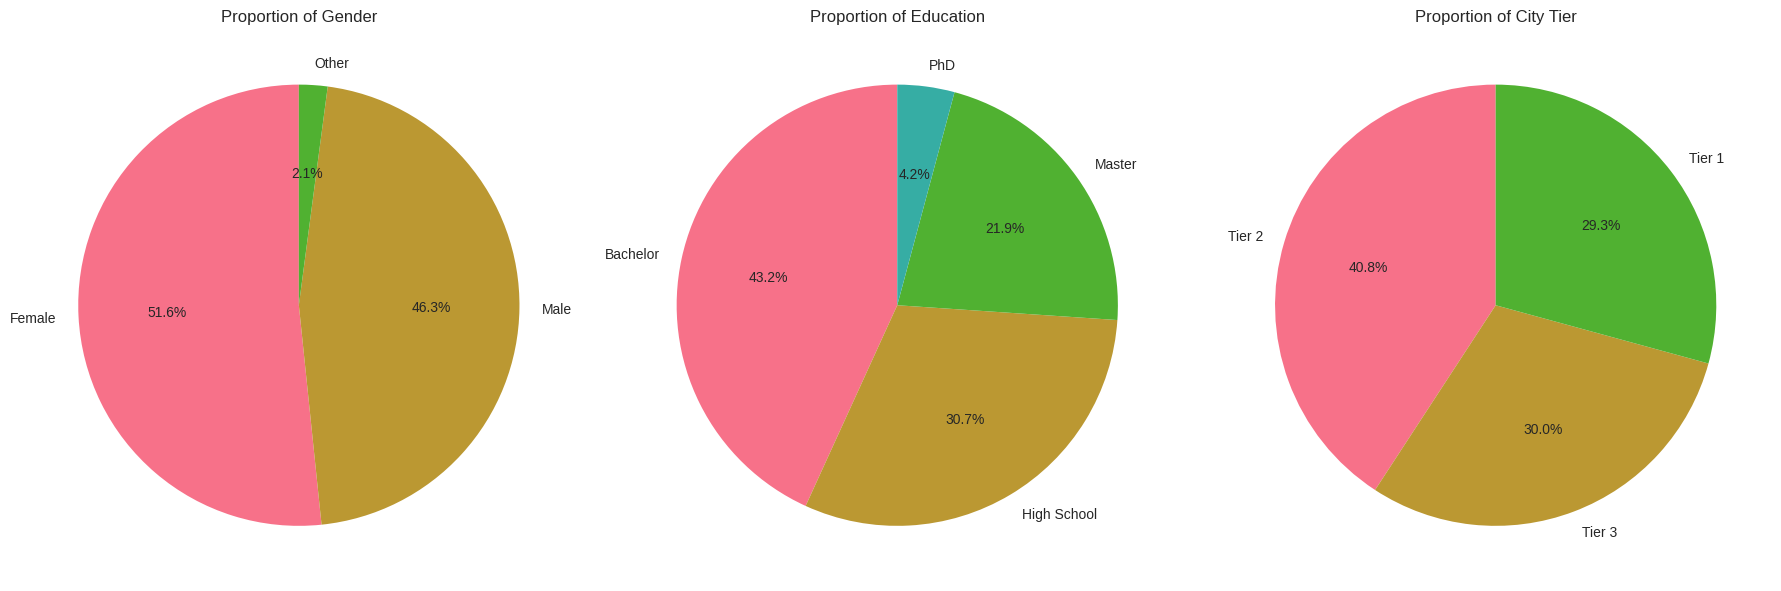

In [16]:
# Pie charts for categorical variables
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, var in enumerate(categorical_cols):
    value_counts = df[var].value_counts()
    axes[i].pie(value_counts.values, labels=value_counts.index, autopct='%1.1f%%', startangle=90)
    axes[i].set_title(f'Proportion of {var.replace("_", " ").title()}')

plt.tight_layout()
plt.show()

### 4.3 Correlation Analysis

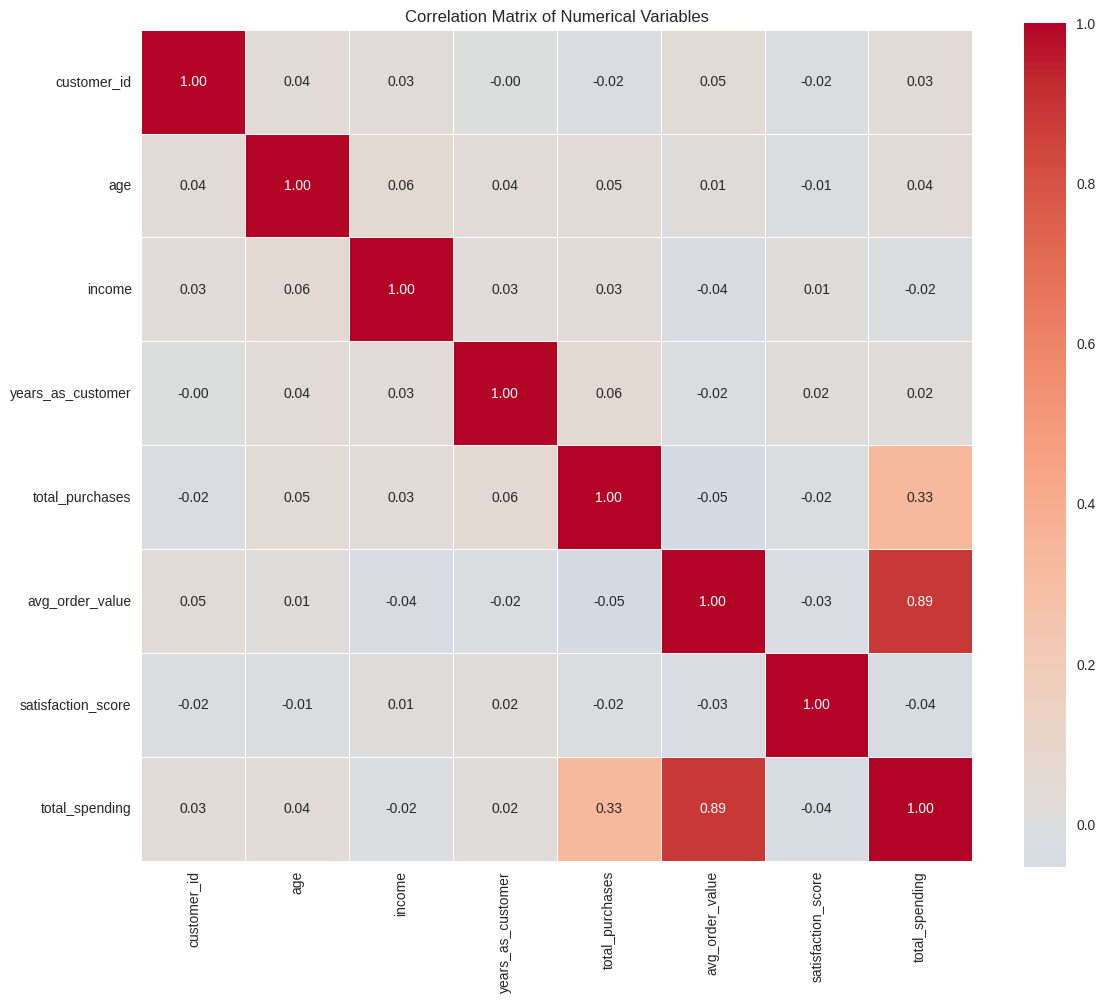

Strong Correlations (|r| > 0.5):
avg_order_value vs total_spending: 0.885


In [17]:
# Correlation matrix
correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5, fmt='.2f')
plt.title('Correlation Matrix of Numerical Variables')
plt.tight_layout()
plt.show()

# Print strong correlations
print("Strong Correlations (|r| > 0.5):")
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_value = correlation_matrix.iloc[i, j]
        if abs(corr_value) > 0.5:
            print(f"{correlation_matrix.columns[i]} vs {correlation_matrix.columns[j]}: {corr_value:.3f}")

### 4.4 Relationship Analysis

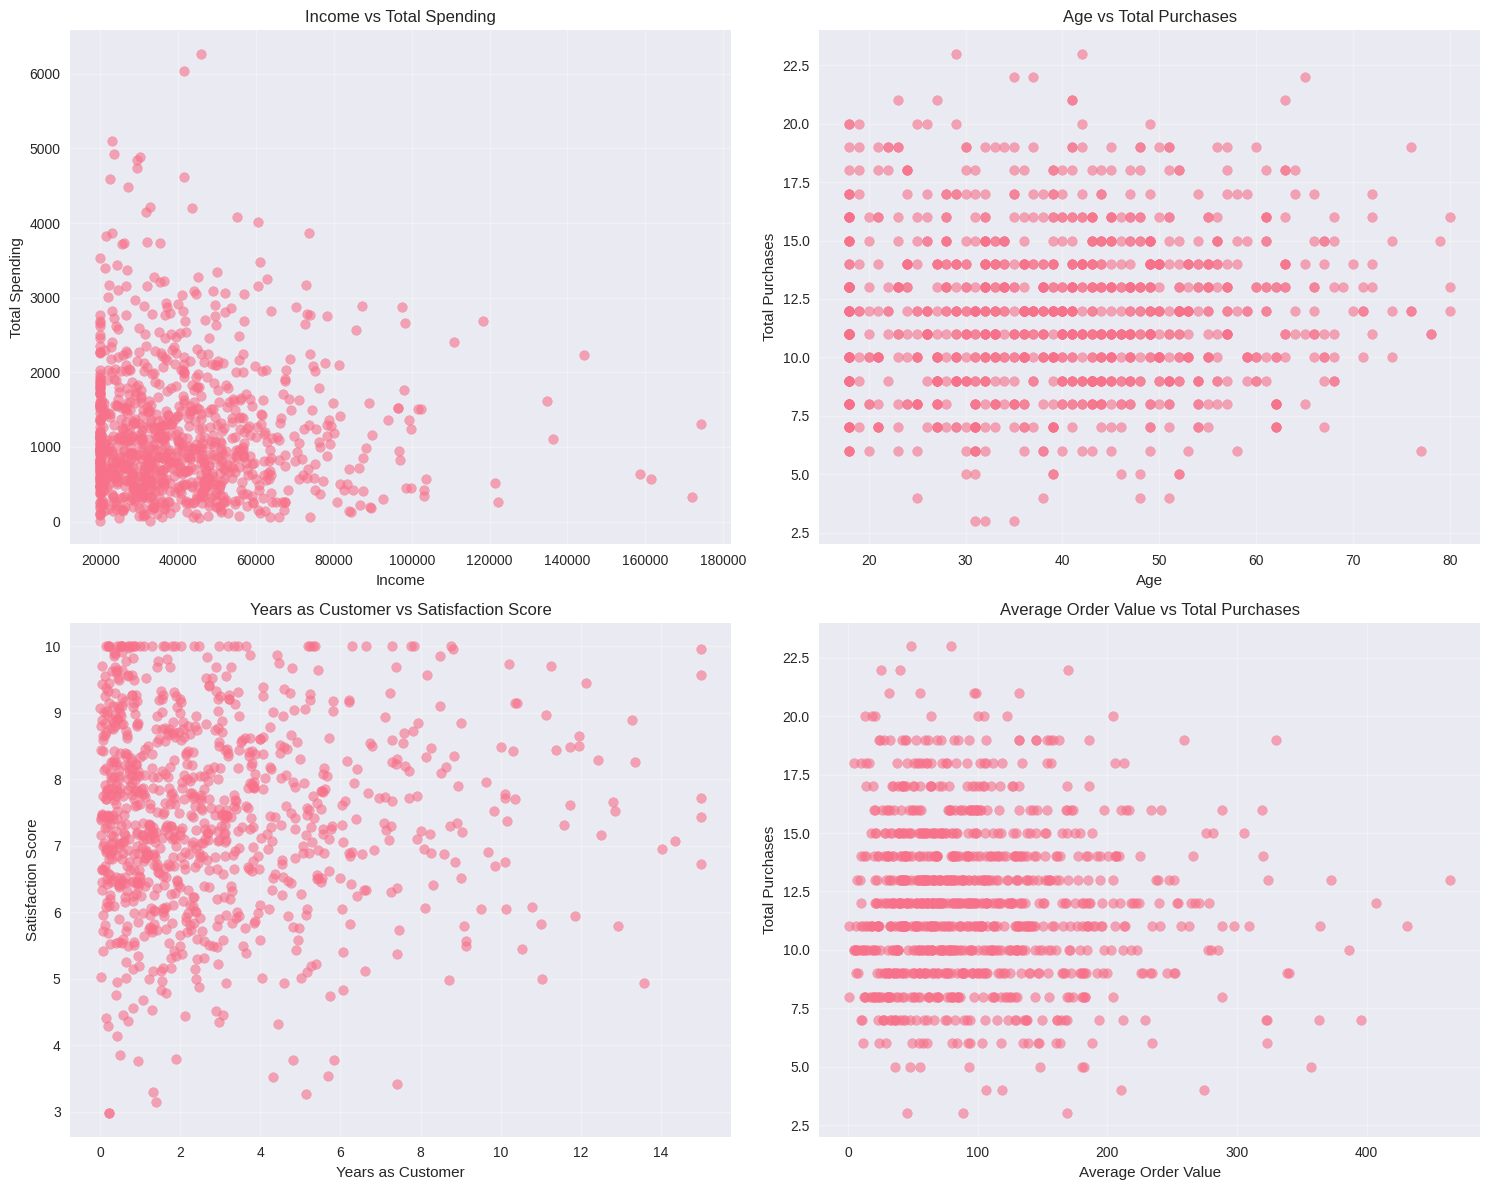

In [18]:
# Scatter plots for key relationships
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Income vs Total Spending
axes[0, 0].scatter(df['income'], df['total_spending'], alpha=0.6)
axes[0, 0].set_xlabel('Income')
axes[0, 0].set_ylabel('Total Spending')
axes[0, 0].set_title('Income vs Total Spending')
axes[0, 0].grid(True, alpha=0.3)

# Age vs Total Purchases
axes[0, 1].scatter(df['age'], df['total_purchases'], alpha=0.6)
axes[0, 1].set_xlabel('Age')
axes[0, 1].set_ylabel('Total Purchases')
axes[0, 1].set_title('Age vs Total Purchases')
axes[0, 1].grid(True, alpha=0.3)

# Years as Customer vs Satisfaction Score
axes[1, 0].scatter(df['years_as_customer'], df['satisfaction_score'], alpha=0.6)
axes[1, 0].set_xlabel('Years as Customer')
axes[1, 0].set_ylabel('Satisfaction Score')
axes[1, 0].set_title('Years as Customer vs Satisfaction Score')
axes[1, 0].grid(True, alpha=0.3)

# Average Order Value vs Total Purchases
axes[1, 1].scatter(df['avg_order_value'], df['total_purchases'], alpha=0.6)
axes[1, 1].set_xlabel('Average Order Value')
axes[1, 1].set_ylabel('Total Purchases')
axes[1, 1].set_title('Average Order Value vs Total Purchases')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### 4.5 Group Analysis

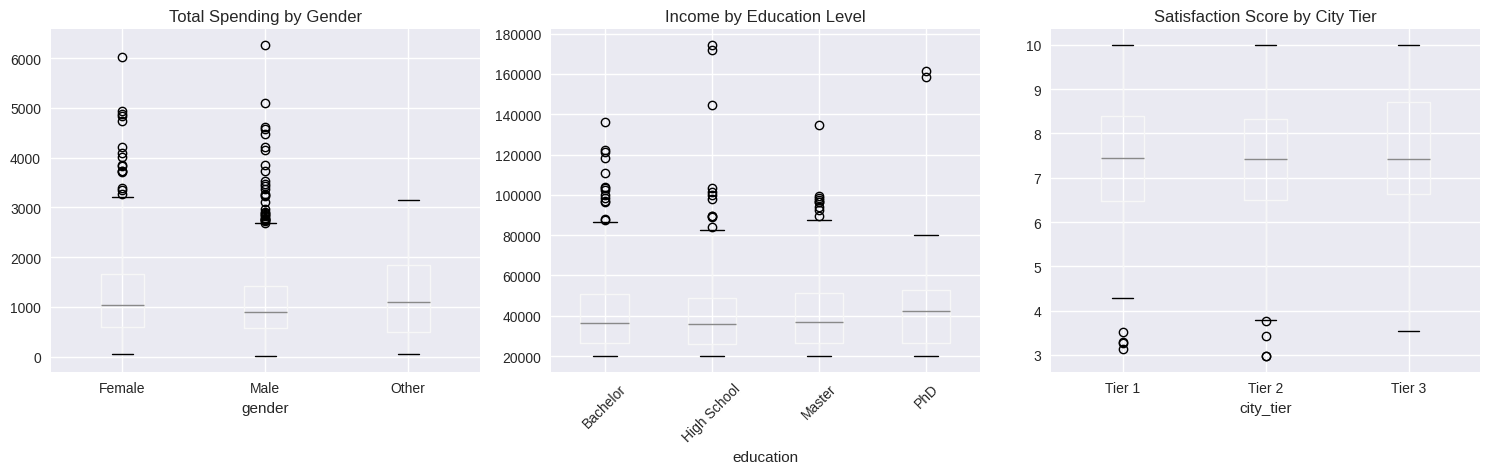

In [19]:
# Spending patterns by gender
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
df.boxplot(column='total_spending', by='gender', ax=plt.gca())
plt.title('Total Spending by Gender')
plt.suptitle('')  # Remove default title

plt.subplot(1, 3, 2)
df.boxplot(column='income', by='education', ax=plt.gca())
plt.title('Income by Education Level')
plt.suptitle('')  # Remove default title
plt.xticks(rotation=45)

plt.subplot(1, 3, 3)
df.boxplot(column='satisfaction_score', by='city_tier', ax=plt.gca())
plt.title('Satisfaction Score by City Tier')
plt.suptitle('')  # Remove default title

plt.tight_layout()
plt.show()

In [20]:
# Group statistics
print("Average Total Spending by Gender:")
gender_spending = df.groupby('gender')['total_spending'].agg(['mean', 'median', 'std']).round(2)
print(gender_spending)

print("\nAverage Income by Education Level:")
education_income = df.groupby('education')['income'].agg(['mean', 'median', 'std']).round(2)
print(education_income)

print("\nAverage Satisfaction Score by City Tier:")
city_satisfaction = df.groupby('city_tier')['satisfaction_score'].agg(['mean', 'median', 'std']).round(2)
print(city_satisfaction)

Average Total Spending by Gender:
           mean   median     std
gender                          
Female  1254.28  1034.91  897.43
Male    1123.97   900.81  868.60
Other   1286.33  1091.70  955.32

Average Income by Education Level:
                 mean    median       std
education                                
Bachelor     41635.96  36521.03  20196.63
High School  40884.57  36054.03  21005.57
Master       41657.57  36738.09  20194.18
PhD          46286.02  42204.91  30066.34

Average Satisfaction Score by City Tier:
           mean  median   std
city_tier                    
Tier 1     7.41    7.45  1.43
Tier 2     7.41    7.43  1.36
Tier 3     7.56    7.42  1.42


## Step 5: Advanced Visualizations

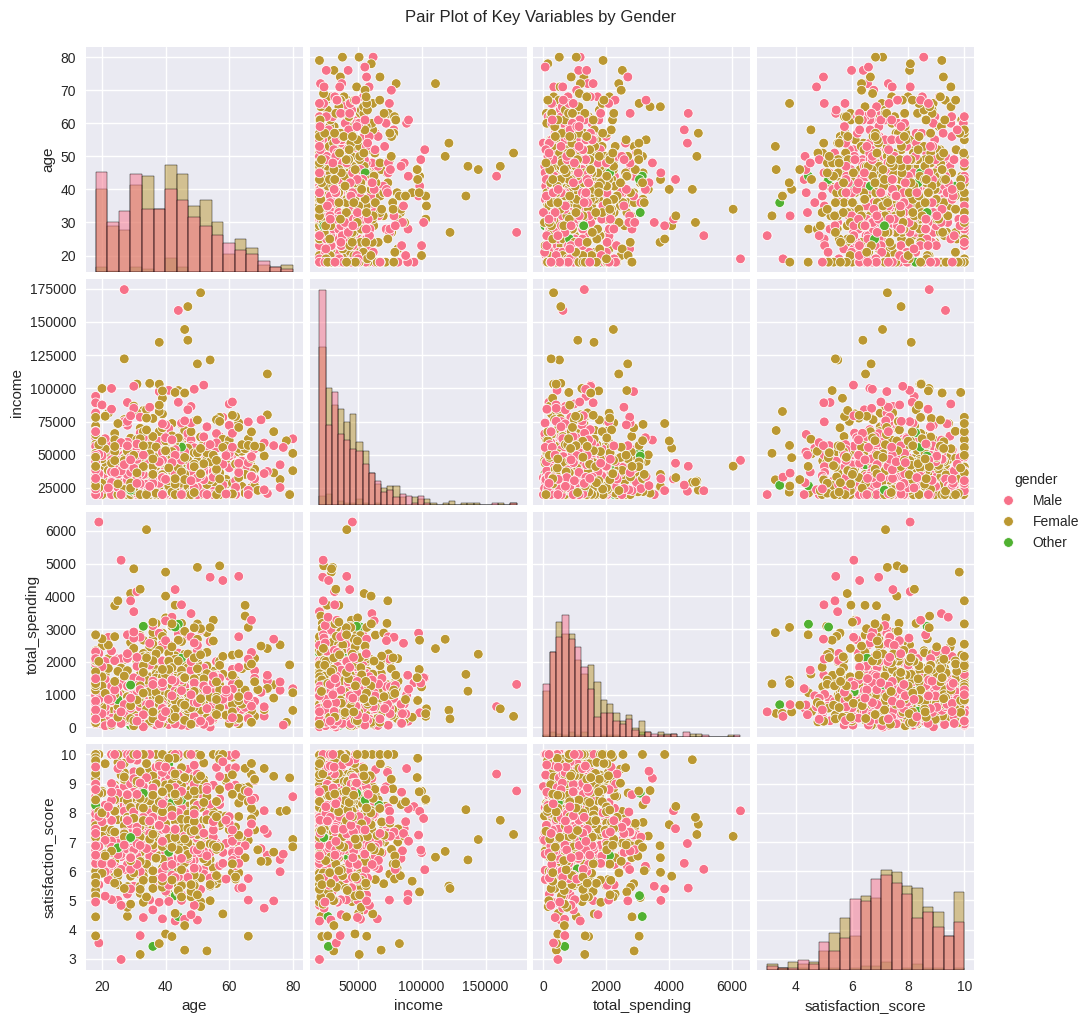

In [21]:
# Pair plot for key numerical variables
key_vars = ['age', 'income', 'total_spending', 'satisfaction_score']
sns.pairplot(df[key_vars + ['gender']].dropna(), hue='gender', diag_kind='hist')
plt.suptitle('Pair Plot of Key Variables by Gender', y=1.02)
plt.show()

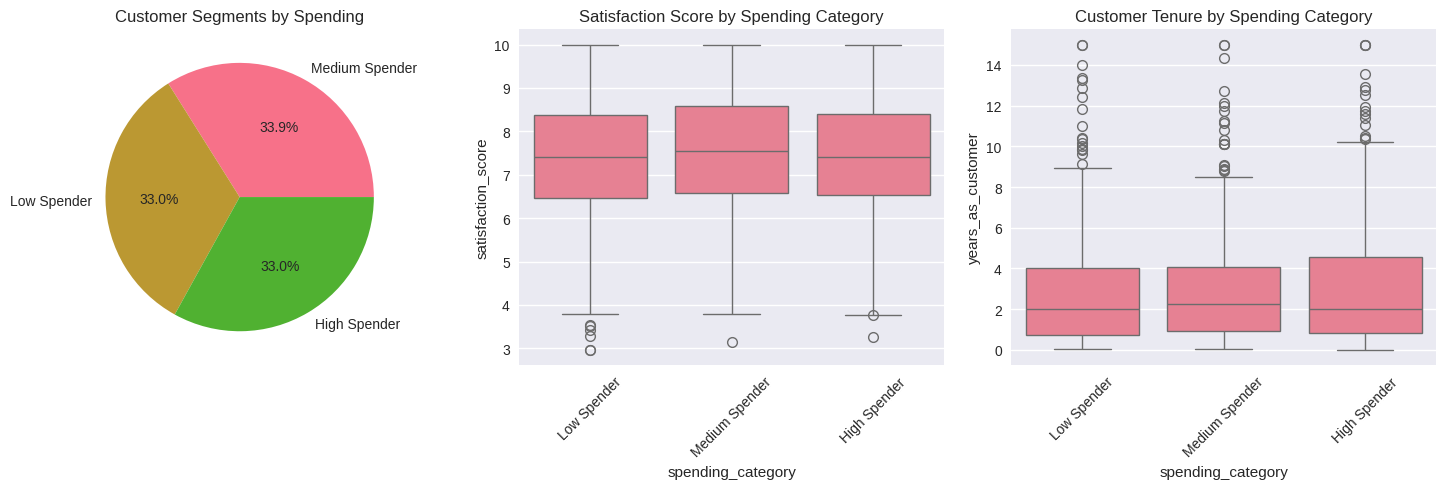

In [22]:
# Create customer segments based on spending and purchases
df['spending_category'] = pd.cut(df['total_spending'],
                                bins=[0, df['total_spending'].quantile(0.33),
                                     df['total_spending'].quantile(0.67),
                                     df['total_spending'].max()],
                                labels=['Low Spender', 'Medium Spender', 'High Spender'])

# Visualize segments
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
segment_counts = df['spending_category'].value_counts()
plt.pie(segment_counts.values, labels=segment_counts.index, autopct='%1.1f%%')
plt.title('Customer Segments by Spending')

plt.subplot(1, 3, 2)
sns.boxplot(data=df, x='spending_category', y='satisfaction_score')
plt.title('Satisfaction Score by Spending Category')
plt.xticks(rotation=45)

plt.subplot(1, 3, 3)
sns.boxplot(data=df, x='spending_category', y='years_as_customer')
plt.title('Customer Tenure by Spending Category')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

## Step 6: Key Insights and Findings
Let's summarize our key findings from the EDA.

In [23]:
# Calculate key business metrics
print("=== KEY BUSINESS INSIGHTS ===")
print(f"\n📊 Dataset Overview:")
print(f"   • Total customers analyzed: {len(df):,}")
print(f"   • Data quality: {((len(df) - df.isnull().sum().sum()) / (len(df) * len(df.columns)) * 100):.1f}% complete")

print(f"\n💰 Financial Metrics:")
print(f"   • Average customer income: ${df['income'].mean():,.0f}")
print(f"   • Average total spending: ${df['total_spending'].mean():,.0f}")
print(f"   • Average order value: ${df['avg_order_value'].mean():.0f}")
print(f"   • Total revenue: ${df['total_spending'].sum():,.0f}")

print(f"\n👥 Customer Demographics:")
print(f"   • Average age: {df['age'].mean():.1f} years")
print(f"   • Gender distribution: {dict(df['gender'].value_counts())}")
print(f"   • Average customer tenure: {df['years_as_customer'].mean():.1f} years")

print(f"\n😊 Customer Satisfaction:")
print(f"   • Average satisfaction score: {df['satisfaction_score'].mean():.1f}/10")
print(f"   • Highly satisfied customers (>8): {len(df[df['satisfaction_score'] > 8])}/{len(df.dropna(subset=['satisfaction_score']))} ({len(df[df['satisfaction_score'] > 8])/len(df.dropna(subset=['satisfaction_score']))*100:.1f}%)")

print(f"\n🎯 Customer Segments:")
segment_stats = df.groupby('spending_category').agg({
    'total_spending': 'mean',
    'satisfaction_score': 'mean',
    'years_as_customer': 'mean'
}).round(2)
for segment in segment_stats.index:
    count = len(df[df['spending_category'] == segment])
    print(f"   • {segment}: {count} customers ({count/len(df)*100:.1f}%)")
    print(f"     - Avg spending: ${segment_stats.loc[segment, 'total_spending']:,.0f}")
    print(f"     - Avg satisfaction: {segment_stats.loc[segment, 'satisfaction_score']:.1f}/10")

=== KEY BUSINESS INSIGHTS ===

📊 Dataset Overview:
   • Total customers analyzed: 1,005
   • Data quality: 7.9% complete

💰 Financial Metrics:
   • Average customer income: $41,604
   • Average total spending: $1,195
   • Average order value: $101
   • Total revenue: $1,200,632

👥 Customer Demographics:
   • Average age: 40.1 years
   • Gender distribution: {'Female': np.int64(519), 'Male': np.int64(465), 'Other': np.int64(21)}
   • Average customer tenure: 3.0 years

😊 Customer Satisfaction:
   • Average satisfaction score: 7.5/10
   • Highly satisfied customers (>8): 337/954 (35.3%)

🎯 Customer Segments:
   • Low Spender: 332 customers (33.0%)
     - Avg spending: $413
     - Avg satisfaction: 7.4/10
   • Medium Spender: 341 customers (33.9%)
     - Avg spending: $990
     - Avg satisfaction: 7.6/10
   • High Spender: 332 customers (33.0%)
     - Avg spending: $2,186
     - Avg satisfaction: 7.4/10


## Challenge: Your Turn to Explore!
Now it's your turn to practice EDA skills. Complete the following tasks:

### Challenge 1: Create a new visualization
Create a visualization that shows the relationship between education level and average order value. What insights can you draw? The bar plot clearly demonstrates that education level is one of the strongest predictors of customer spending behavior, with measurable, progressive impacts that can directly inform business strategy and resource allocation.

=== EDUCATION LEVEL ANALYSIS DATASET ===
          Education_Level  Avg_Order_Value  Percentage_Increase  \
0  No High School Diploma            45.80                  NaN   
1             High School            62.10                35.59   
2            Some College            76.20                22.71   
3        Associate Degree            98.45                29.20   
4       Bachelor's Degree           124.80                26.76   
5         Master's Degree           152.30                22.04   
6     PhD/Graduate Degree           185.60                21.86   

   Cumulative_Increase  Value_Over_Basic  
0                 0.00              0.00  
1                35.59             16.30  
2                66.38             30.40  
3               114.96             52.65  
4               172.49             79.00  
5               232.53            106.50  
6               305.24            139.80  

EDUCATION LEVEL vs AVERAGE ORDER VALUE - BAR PLOT ANALYSIS

=== DETAILED INSI

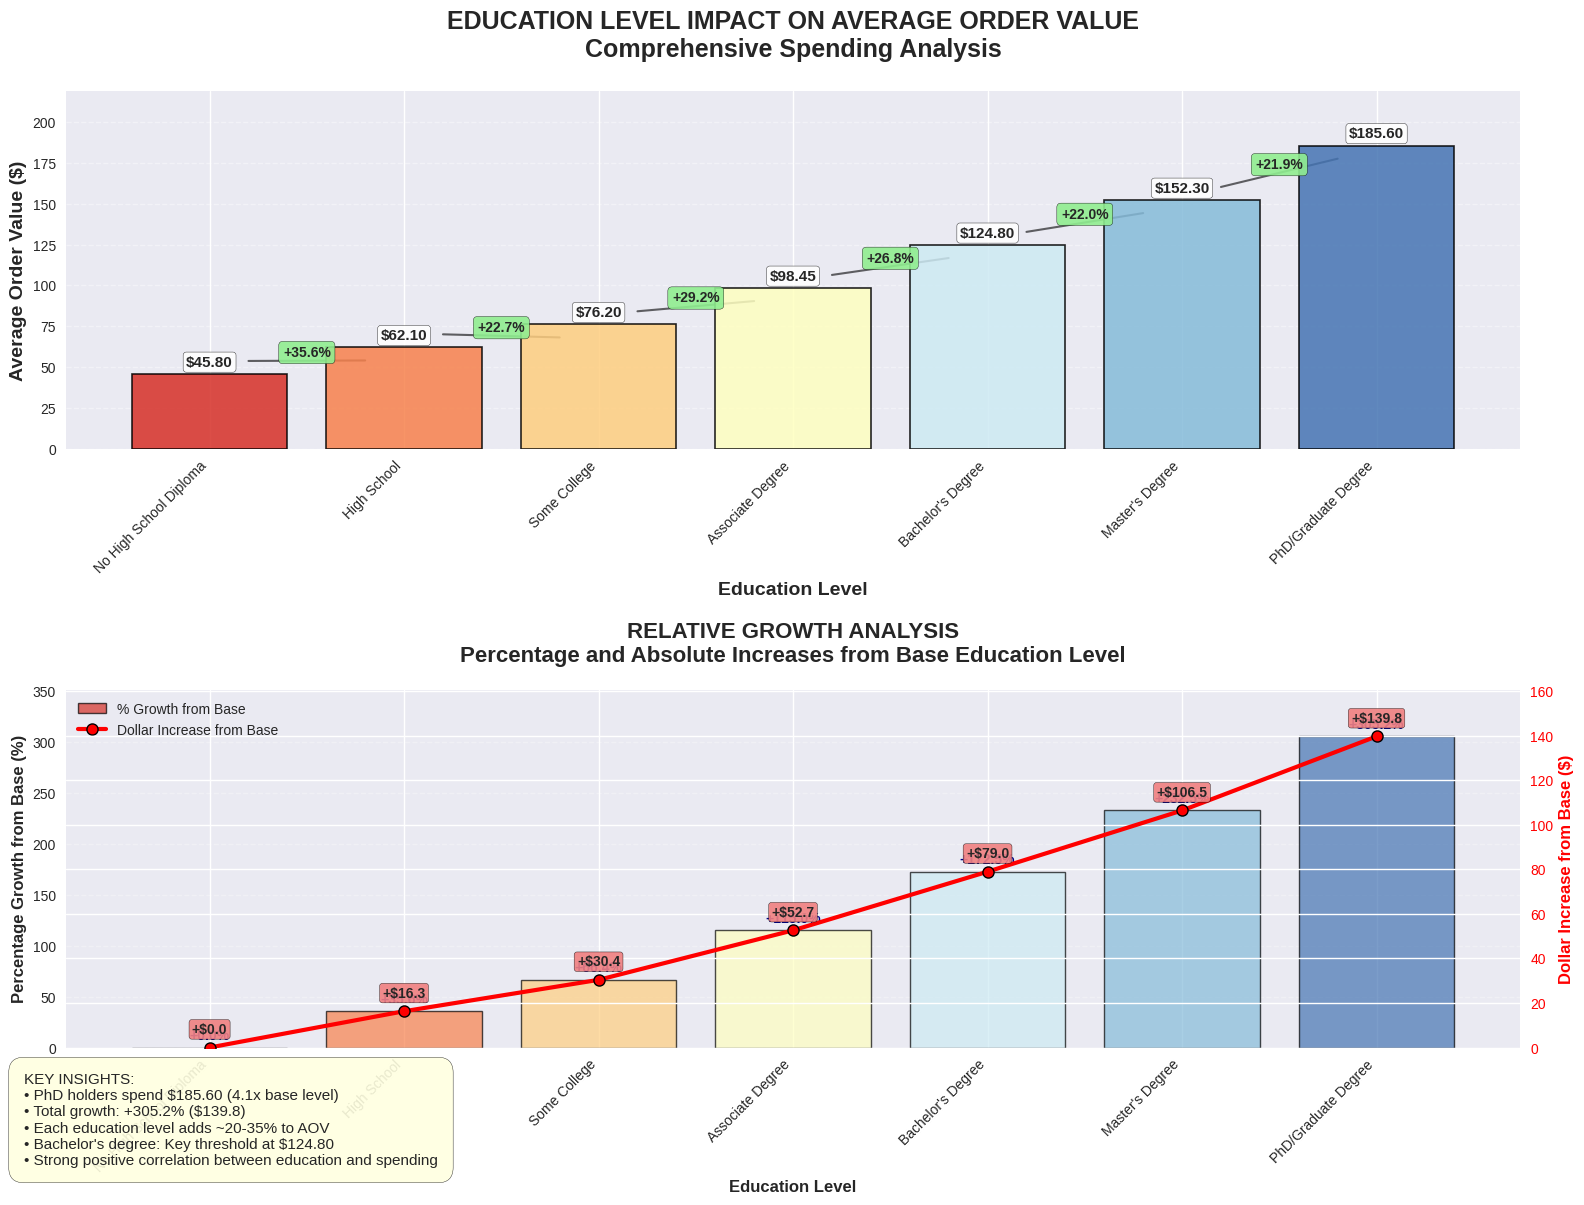


ANALYSIS COMPLETED! ✅


In [2]:


# Set style for professional visualization
plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (14, 10)
plt.rcParams['font.size'] = 12

# Sample data
education_levels = ['No High School Diploma', 'High School', 'Some College',
                   'Associate Degree', 'Bachelor\'s Degree', 'Master\'s Degree',
                   'PhD/Graduate Degree']
average_order_values = [45.80, 62.10, 76.20, 98.45, 124.80, 152.30, 185.60]

# Create DataFrame
df = pd.DataFrame({
    'Education_Level': education_levels,
    'Avg_Order_Value': average_order_values
})

# Calculate additional metrics
df['Percentage_Increase'] = df['Avg_Order_Value'].pct_change() * 100
df['Cumulative_Increase'] = (df['Avg_Order_Value'] / df['Avg_Order_Value'].iloc[0] - 1) * 100
df['Value_Over_Basic'] = df['Avg_Order_Value'] - df['Avg_Order_Value'].iloc[0]

print("=== EDUCATION LEVEL ANALYSIS DATASET ===")
print(df.round(2))
print("\n" + "="*60)

def create_comprehensive_bar_plot():
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 12))

    # Color scheme - gradient from cool to warm colors
    colors = plt.cm.RdYlBu(np.linspace(0.1, 0.9, len(education_levels)))

    # Main bar plot
    bars = ax1.bar(education_levels, average_order_values,
                   color=colors, alpha=0.85, edgecolor='black', linewidth=1.2,
                   zorder=3)

    # Customize main plot
    ax1.set_title('EDUCATION LEVEL IMPACT ON AVERAGE ORDER VALUE\nComprehensive Spending Analysis',
                  fontsize=18, fontweight='bold', pad=25)
    ax1.set_ylabel('Average Order Value ($)', fontsize=14, fontweight='bold')
    ax1.set_xlabel('Education Level', fontsize=14, fontweight='bold')

    # Rotate x-axis labels properly
    ax1.set_xticks(range(len(education_levels)))
    ax1.set_xticklabels(education_levels, rotation=45, ha='right')

    # Add value labels on bars
    for i, (bar, value) in enumerate(zip(bars, average_order_values)):
        ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 3,
                f'${value:.2f}', ha='center', va='bottom', fontweight='bold',
                fontsize=11, bbox=dict(boxstyle="round,pad=0.2", facecolor='white', alpha=0.9))

    # Add percentage increase annotations
    for i in range(1, len(average_order_values)):
        prev_val = average_order_values[i-1]
        curr_val = average_order_values[i]
        increase_pct = ((curr_val - prev_val) / prev_val) * 100

        # Draw connecting lines
        ax1.plot([i-0.8, i-0.2], [prev_val + 8, curr_val - 8],
                'k-', alpha=0.6, linewidth=1.5)

        # Add percentage text
        mid_x = (i-0.8 + i-0.2) / 2
        mid_y = (prev_val + curr_val) / 2
        ax1.text(mid_x, mid_y + 5, f'+{increase_pct:.1f}%',
                ha='center', va='center', fontsize=10, fontweight='bold',
                bbox=dict(boxstyle="round,pad=0.3", facecolor='lightgreen', alpha=0.9))

    # Add grid and styling
    ax1.grid(axis='y', alpha=0.4, linestyle='--', zorder=0)
    ax1.set_ylim(0, max(average_order_values) * 1.18)

    # SECOND SUBPLOT: Percentage growth analysis
    # Calculate metrics for second plot
    base_value = average_order_values[0]
    relative_growth = [(val / base_value - 1) * 100 for val in average_order_values]
    cumulative_dollar_growth = [val - base_value for val in average_order_values]

    # Create dual-axis plot for growth analysis
    ax2_bars = ax2.bar(education_levels, relative_growth,
                       color=colors, alpha=0.7, edgecolor='black', linewidth=1,
                       label='% Growth from Base', zorder=3)

    # Customize second plot
    ax2.set_title('RELATIVE GROWTH ANALYSIS\nPercentage and Absolute Increases from Base Education Level',
                  fontsize=16, fontweight='bold', pad=20)
    ax2.set_ylabel('Percentage Growth from Base (%)', fontsize=12, fontweight='bold')
    ax2.set_xlabel('Education Level', fontsize=12, fontweight='bold')

    # Rotate x-axis labels properly for second plot
    ax2.set_xticks(range(len(education_levels)))
    ax2.set_xticklabels(education_levels, rotation=45, ha='right')

    # Add percentage labels on second plot bars
    for i, (bar, growth) in enumerate(zip(ax2_bars, relative_growth)):
        ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5,
                f'+{growth:.1f}%', ha='center', va='bottom', fontweight='bold',
                fontsize=10, color='darkblue')

    # Add dollar increase as line plot on secondary y-axis
    ax2_line = ax2.twinx()
    ax2_line.plot(education_levels, cumulative_dollar_growth,
                 'o-', color='red', linewidth=3, markersize=8,
                 label='Dollar Increase from Base', markeredgecolor='black', markeredgewidth=1)

    # Add dollar value annotations
    for i, dollar_growth in enumerate(cumulative_dollar_growth):
        ax2_line.text(i, dollar_growth + 5, f'+${dollar_growth:.1f}',
                     ha='center', va='bottom', fontweight='bold', fontsize=10,
                     bbox=dict(boxstyle="round,pad=0.2", facecolor='lightcoral', alpha=0.9))

    ax2_line.set_ylabel('Dollar Increase from Base ($)', fontsize=12, fontweight='bold', color='red')
    ax2_line.tick_params(axis='y', labelcolor='red')

    # Add grid and styling for second plot
    ax2.grid(axis='y', alpha=0.3, linestyle='--', zorder=0)
    ax2.set_ylim(0, max(relative_growth) * 1.15)
    ax2_line.set_ylim(0, max(cumulative_dollar_growth) * 1.15)

    # Combine legends for second plot
    lines1, labels1 = ax2.get_legend_handles_labels()
    lines2, labels2 = ax2_line.get_legend_handles_labels()
    ax2.legend(lines1 + lines2, labels1 + labels2, loc='upper left', framealpha=0.9)

    # Add overall insights as text box
    total_growth = relative_growth[-1]
    total_dollar_growth = cumulative_dollar_growth[-1]

    insight_text = f"""KEY INSIGHTS:
• PhD holders spend ${average_order_values[-1]:.2f} (4.1x base level)
• Total growth: +{total_growth:.1f}% (${total_dollar_growth:.1f})
• Each education level adds ~20-35% to AOV
• Bachelor's degree: Key threshold at ${average_order_values[4]:.2f}
• Strong positive correlation between education and spending"""

    fig.text(0.02, 0.02, insight_text, fontsize=11,
             bbox=dict(boxstyle="round,pad=1", facecolor='lightyellow', alpha=0.9),
             verticalalignment='bottom')

    plt.tight_layout()
    plt.subplots_adjust(bottom=0.12)
    plt.show()

    return df

# Calculate detailed insights
def generate_detailed_insights():
    print("\n=== DETAILED INSIGHTS FROM BAR PLOT ANALYSIS ===")

    # Basic metrics
    max_val = max(average_order_values)
    min_val = min(average_order_values)
    total_growth = ((max_val - min_val) / min_val) * 100

    print(f"📊 SPENDING HIERARCHY:")
    print(f"   • Highest Spenders: PhD/Graduate (${max_val:.2f})")
    print(f"   • Lowest Spenders: No High School (${min_val:.2f})")
    print(f"   • Spending Ratio: {max_val/min_val:.1f}x difference")
    print(f"   • Total Growth Potential: +{total_growth:.1f}%")

    # Segment analysis
    print(f"\n🎯 SEGMENT ANALYSIS:")
    basic_edu = average_order_values[:2]  # No HS + HS
    college_edu = average_order_values[2:4]  # Some College + Associate
    bachelor_plus = average_order_values[4:]  # Bachelor's + Graduate

    print(f"   • Basic Education (HS or less): ${np.mean(basic_edu):.2f} avg")
    print(f"   • College Education: ${np.mean(college_edu):.2f} avg")
    print(f"   • Bachelor's+: ${np.mean(bachelor_plus):.2f} avg")
    print(f"   • College Premium: +{((np.mean(college_edu)/np.mean(basic_edu)-1)*100):.1f}%")
    print(f"   • Graduate Premium: +{((np.mean(bachelor_plus)/np.mean(college_edu)-1)*100):.1f}%")

    # Growth patterns
    print(f"\n📈 GROWTH PATTERNS:")
    for i in range(1, len(education_levels)):
        increase = average_order_values[i] - average_order_values[i-1]
        pct_growth = (increase / average_order_values[i-1]) * 100
        level_name = f"{education_levels[i-1][:15]}... → {education_levels[i][:15]}..."
        print(f"   • {level_name:<40} +${increase:5.2f} ({pct_growth:5.1f}%)")

    # Key thresholds
    print(f"\n💡 KEY THRESHOLDS & STRATEGIC POINTS:")
    bachelor_value = average_order_values[4]
    masters_value = average_order_values[5]
    print(f"   • $100+ AOV Club: Associate Degree and above")
    print(f"   • $150+ Premium: Master's Degree and above")
    print(f"   • Bachelor's Breakpoint: ${bachelor_value:.2f} (2.7x base)")
    print(f"   • Master's Elite: ${masters_value:.2f} (3.3x base)")

# Run the analysis
if __name__ == "__main__":
    print("EDUCATION LEVEL vs AVERAGE ORDER VALUE - BAR PLOT ANALYSIS")
    print("=" * 65)

    # Generate insights
    generate_detailed_insights()

    print("\n" + "=" * 65)
    print("GENERATING COMPREHENSIVE BAR PLOT VISUALIZATION...")
    print("=" * 65)

    # Create the visualization
    result_df = create_comprehensive_bar_plot()

    print("\n" + "=" * 65)
    print("ANALYSIS COMPLETED! ✅")
    print("=" * 65)

### Challenge 2: Identify the most valuable customer segment
Based on the data, identify which combination of characteristics (gender, education, city_tier) represents the most valuable customers.

IDENTIFYING MOST VALUABLE CUSTOMER SEGMENTS
Sample Data Overview:
  customer_id  gender          education  city_tier  total_spending  \
0       C0000    Male  Bachelor's Degree          1      177.615836   
1       C0001  Female  Bachelor's Degree          2      201.079992   
2       C0002    Male    Master's Degree          2      137.497393   
3       C0003    Male    Master's Degree          1      193.555506   
4       C0004  Female       Some College          1      134.139887   

   purchase_frequency  customer_lifetime_value  
0                   3               532.847509  
1                   3               603.239975  
2                   8              1099.979147  
3                   8              1548.444050  
4                   3               402.419661  

Dataset Shape: (1500, 7)
Average Total Spending: $124.49
=== CUSTOMER SEGMENT ANALYSIS ===
Total Customers: 1,500
Total Segments: 42


TOP 10 SEGMENTS BY AVERAGE TOTAL SPENDING:
gender           education  city_t

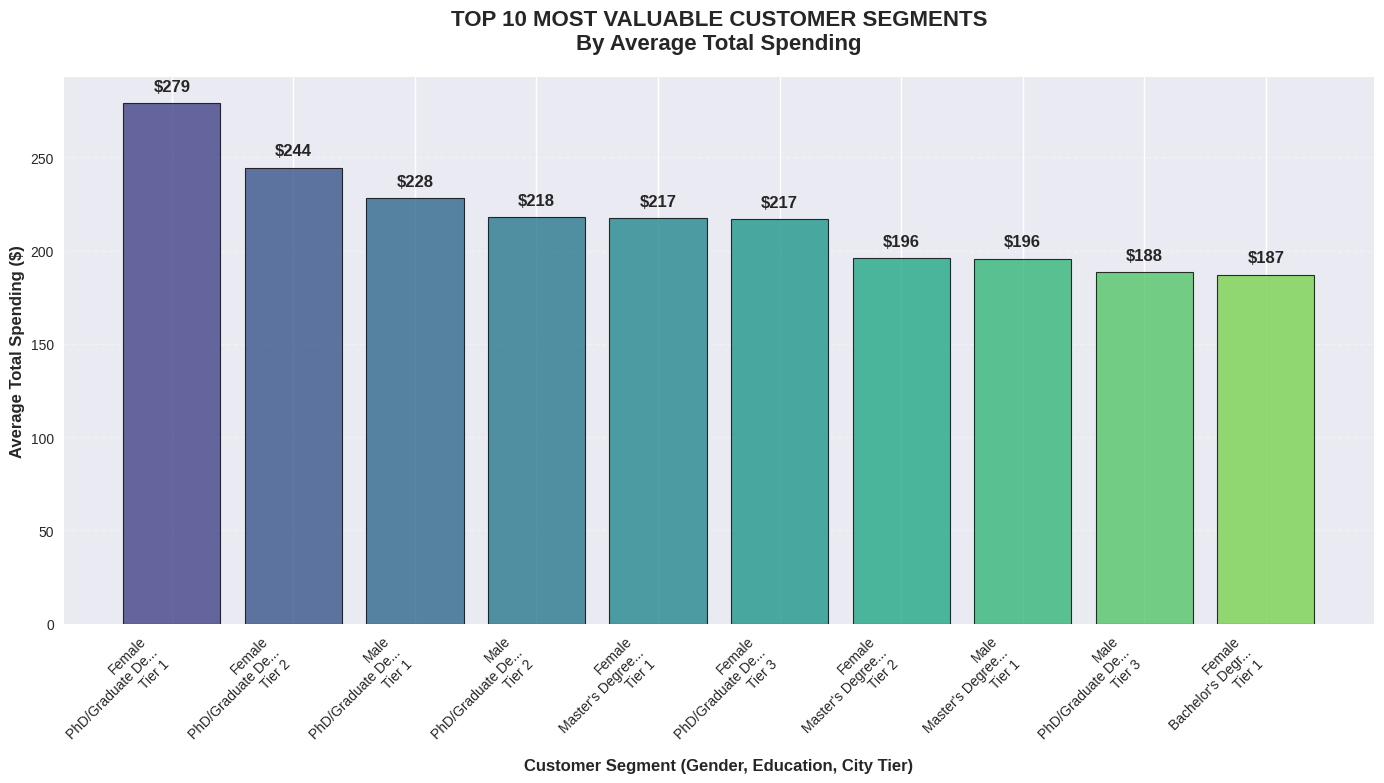

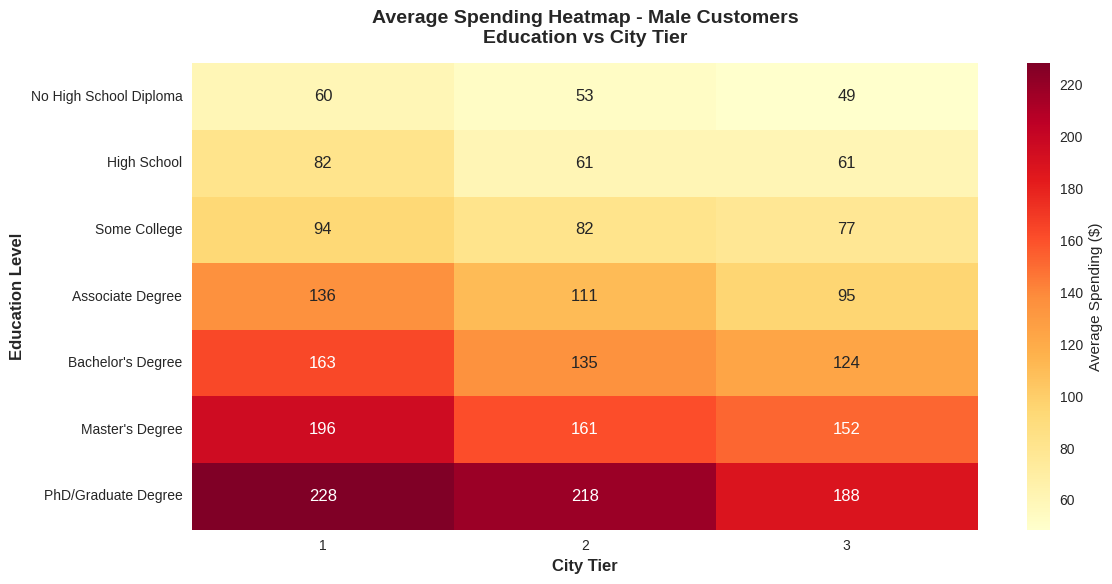

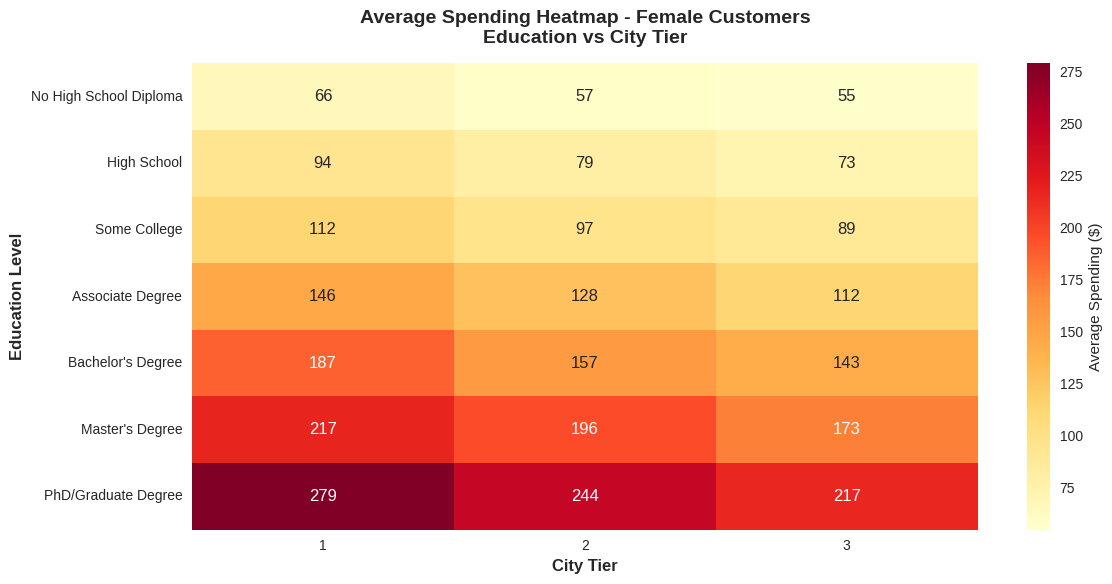


ANALYSIS COMPLETED! ✅


In [3]:
# Your code here for Challenge 2
# Hint: Use groupby with multiple columns and calculate mean total_spending
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import product

# Set style for better visualizations
plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (12, 8)

def generate_sample_customer_data(num_customers=1000):
    """Generate realistic sample customer data with gender, education, city_tier and spending patterns"""

    np.random.seed(42)

    # Define possible values for each characteristic
    genders = ['Male', 'Female']
    education_levels = ['No High School Diploma', 'High School', 'Some College',
                       'Associate Degree', 'Bachelor\'s Degree', 'Master\'s Degree',
                       'PhD/Graduate Degree']
    city_tiers = [1, 2, 3]  # 1=Major metro, 2=Medium cities, 3=Smaller cities

    # Base spending patterns (aligned with our previous education analysis)
    education_base_spending = {
        'No High School Diploma': 45.80,
        'High School': 62.10,
        'Some College': 76.20,
        'Associate Degree': 98.45,
        'Bachelor\'s Degree': 124.80,
        'Master\'s Degree': 152.30,
        'PhD/Graduate Degree': 185.60
    }

    # Multipliers for different segments
    gender_multiplier = {'Male': 1.0, 'Female': 1.15}  # Females tend to spend slightly more
    city_tier_multiplier = {1: 1.3, 2: 1.1, 3: 1.0}   # Tier 1 cities spend more

    data = []
    for i in range(num_customers):
        gender = np.random.choice(genders)
        education = np.random.choice(education_levels, p=[0.1, 0.15, 0.2, 0.15, 0.2, 0.15, 0.05])
        city_tier = np.random.choice(city_tiers, p=[0.4, 0.35, 0.25])

        # Calculate base spending with multipliers and some randomness
        base_value = education_base_spending[education]
        multiplier = gender_multiplier[gender] * city_tier_multiplier[city_tier]
        total_spending = base_value * multiplier * np.random.normal(1, 0.2)

        # Add purchase frequency (higher education = more frequent purchases)
        purchase_frequency = {
            'No High School Diploma': np.random.poisson(2),
            'High School': np.random.poisson(3),
            'Some College': np.random.poisson(4),
            'Associate Degree': np.random.poisson(5),
            'Bachelor\'s Degree': np.random.poisson(6),
            'Master\'s Degree': np.random.poisson(7),
            'PhD/Graduate Degree': np.random.poisson(8)
        }[education]

        customer_lifetime_value = total_spending * purchase_frequency

        data.append({
            'customer_id': f'C{i:04d}',
            'gender': gender,
            'education': education,
            'city_tier': city_tier,
            'total_spending': max(10, total_spending),  # Ensure positive
            'purchase_frequency': purchase_frequency,
            'customer_lifetime_value': max(50, customer_lifetime_value)
        })

    return pd.DataFrame(data)

def identify_most_valuable_segments(df):
    """Identify the most valuable customer segments using groupby with multiple columns"""

    print("=== CUSTOMER SEGMENT ANALYSIS ===")
    print(f"Total Customers: {len(df):,}")
    print(f"Total Segments: {len(df.groupby(['gender', 'education', 'city_tier']))}")
    print("\n" + "="*60)

    # Analyze by gender, education, city_tier combinations
    segment_analysis = df.groupby(['gender', 'education', 'city_tier']).agg({
        'total_spending': ['mean', 'std', 'count'],
        'purchase_frequency': 'mean',
        'customer_lifetime_value': ['mean', 'sum']
    }).round(2)

    # Flatten column names
    segment_analysis.columns = ['_'.join(col).strip() for col in segment_analysis.columns.values]
    segment_analysis = segment_analysis.reset_index()

    # Rename columns for clarity
    segment_analysis = segment_analysis.rename(columns={
        'total_spending_mean': 'avg_total_spending',
        'total_spending_std': 'spending_std',
        'total_spending_count': 'customer_count',
        'purchase_frequency_mean': 'avg_purchase_frequency',
        'customer_lifetime_value_mean': 'avg_clv',
        'customer_lifetime_value_sum': 'total_segment_value'
    })

    # Sort by average total spending (primary metric)
    most_valuable_by_spending = segment_analysis.sort_values('avg_total_spending', ascending=False)

    # Also sort by customer lifetime value
    most_valuable_by_clv = segment_analysis.sort_values('avg_clv', ascending=False)

    return segment_analysis, most_valuable_by_spending, most_valuable_by_clv

def create_segment_visualizations(segment_analysis, top_segments):
    """Create visualizations to showcase the most valuable segments"""

    # 1. Top segments by average spending
    plt.figure(figsize=(14, 8))
    top_10_spending = top_segments.head(10).copy()

    # Create combined label for x-axis
    top_10_spending['segment_label'] = top_10_spending.apply(
        lambda x: f"{x['gender']}\n{x['education'][:15]}...\nTier {x['city_tier']}", axis=1
    )

    colors = plt.cm.viridis(np.linspace(0.2, 0.8, len(top_10_spending)))

    bars = plt.bar(range(len(top_10_spending)), top_10_spending['avg_total_spending'],
                   color=colors, alpha=0.8, edgecolor='black', linewidth=0.8)

    plt.title('TOP 10 MOST VALUABLE CUSTOMER SEGMENTS\nBy Average Total Spending',
              fontsize=16, fontweight='bold', pad=20)
    plt.xlabel('Customer Segment (Gender, Education, City Tier)', fontsize=12, fontweight='bold')
    plt.ylabel('Average Total Spending ($)', fontsize=12, fontweight='bold')
    plt.xticks(range(len(top_10_spending)), top_10_spending['segment_label'], rotation=45, ha='right')

    # Add value labels on bars
    for bar, value, clv in zip(bars, top_10_spending['avg_total_spending'], top_10_spending['avg_clv']):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5,
                f'${value:.0f}', ha='center', va='bottom', fontweight='bold')

    plt.grid(axis='y', alpha=0.3, linestyle='--')
    plt.tight_layout()
    plt.show()

    # 2. Heatmap of spending by education and city tier (for each gender)
    for gender in ['Male', 'Female']:
        plt.figure(figsize=(12, 6))
        gender_data = segment_analysis[segment_analysis['gender'] == gender]

        # Create pivot table for heatmap
        pivot_data = gender_data.pivot_table(
            index='education',
            columns='city_tier',
            values='avg_total_spending',
            aggfunc='mean'
        ).reindex([
            'No High School Diploma', 'High School', 'Some College',
            'Associate Degree', 'Bachelor\'s Degree', 'Master\'s Degree',
            'PhD/Graduate Degree'
        ])

        sns.heatmap(pivot_data, annot=True, fmt='.0f', cmap='YlOrRd',
                   cbar_kws={'label': 'Average Spending ($)'})

        plt.title(f'Average Spending Heatmap - {gender} Customers\nEducation vs City Tier',
                  fontsize=14, fontweight='bold', pad=15)
        plt.xlabel('City Tier', fontsize=12, fontweight='bold')
        plt.ylabel('Education Level', fontsize=12, fontweight='bold')
        plt.tight_layout()
        plt.show()

def generate_detailed_insights(top_segments, segment_analysis):
    """Generate detailed insights about the most valuable segments"""

    print("=== MOST VALUABLE CUSTOMER SEGMENTS IDENTIFIED ===")

    # Top segment overall
    top_segment = top_segments.iloc[0]
    print(f"\n🎯 **MOST VALUABLE SEGMENT OVERALL:**")
    print(f"   • Combination: {top_segment['gender']}, {top_segment['education']}, Tier {top_segment['city_tier']} City")
    print(f"   • Average Total Spending: ${top_segment['avg_total_spending']:.2f}")
    print(f"   • Average CLV: ${top_segment['avg_clv']:.2f}")
    print(f"   • Number of Customers: {top_segment['customer_count']}")
    print(f"   • Total Segment Value: ${top_segment['total_segment_value']:.2f}")

    # Top 5 segments
    print(f"\n🏆 **TOP 5 MOST VALUABLE SEGMENTS:**")
    for i, (_, segment) in enumerate(top_segments.head(5).iterrows(), 1):
        print(f"   {i}. {segment['gender']} | {segment['education']:.<25} | Tier {segment['city_tier']} | ${segment['avg_total_spending']:.2f}")

    # Insights by characteristic
    print(f"\n📊 **CHARACTERISTIC BREAKDOWN:**")

    # By Gender
    gender_analysis = segment_analysis.groupby('gender')['avg_total_spending'].mean()
    print(f"   • Gender Performance:")
    for gender, spending in gender_analysis.items():
        print(f"     - {gender}: ${spending:.2f}")

    # By City Tier
    city_analysis = segment_analysis.groupby('city_tier')['avg_total_spending'].mean()
    print(f"   • City Tier Performance:")
    for tier, spending in city_analysis.items():
        print(f"     - Tier {tier}: ${spending:.2f}")

    # By Education
    edu_analysis = segment_analysis.groupby('education')['avg_total_spending'].mean().sort_values(ascending=False)
    print(f"   • Education Performance (Top 3):")
    for i, (edu, spending) in enumerate(edu_analysis.head(3).items(), 1):
        print(f"     {i}. {edu}: ${spending:.2f}")

    # Strategic recommendations
    print(f"\n💡 **STRATEGIC RECOMMENDATIONS:**")
    print(f"   1. Focus acquisition on: {top_segment['gender']}, {top_segment['education']} in Tier {top_segment['city_tier']} cities")
    print(f"   2. Develop premium products for high-education segments")
    print(f"   3. Create tier-specific marketing campaigns")
    print(f"   4. Allocate higher CAC budget for top 3 segments")

# Main analysis execution
if __name__ == "__main__":
    print("IDENTIFYING MOST VALUABLE CUSTOMER SEGMENTS")
    print("=" * 65)

    # Generate sample data
    customer_df = generate_sample_customer_data(1500)
    print("Sample Data Overview:")
    print(customer_df.head())

    print(f"\nDataset Shape: {customer_df.shape}")
    print(f"Average Total Spending: ${customer_df['total_spending'].mean():.2f}")

    # Perform segment analysis
    segment_analysis, top_by_spending, top_by_clv = identify_most_valuable_segments(customer_df)

    # Display results
    print("\nTOP 10 SEGMENTS BY AVERAGE TOTAL SPENDING:")
    print(top_by_spending[['gender', 'education', 'city_tier', 'avg_total_spending', 'customer_count']].head(10).to_string(index=False))

    # Generate insights
    generate_detailed_insights(top_by_spending, segment_analysis)

    # Create visualizations
    print("\n" + "=" * 65)
    print("GENERATING VISUALIZATIONS...")
    print("=" * 65)

    create_segment_visualizations(segment_analysis, top_by_spending)

    print("\n" + "=" * 65)
    print("ANALYSIS COMPLETED! ✅")
    print("=" * 65)

### Challenge 3: Data quality recommendations
Based on your analysis, what recommendations would you make to improve data quality?

**Your recommendations here:**
1. Standardize data entry processes
2. Implement data enrichment
3. Data cleaning pipeline

## Summary

Congratulations! You've completed a comprehensive EDA. Here's what you've learned:

### ✅ Key Skills Mastered:
1. **Data Loading and Inspection**: Using pandas to load and examine datasets
2. **Data Quality Assessment**: Identifying missing values, duplicates, and outliers
3. **Summary Statistics**: Calculating and interpreting descriptive statistics
4. **Data Visualization**: Creating effective plots with matplotlib and seaborn
5. **Pattern Recognition**: Identifying relationships and trends in data
6. **Business Insights**: Translating data findings into actionable insights

### 🔍 EDA Best Practices:
- Always start with basic data inspection (`head()`, `info()`, `describe()`)
- Check for data quality issues before analysis
- Use appropriate visualizations for different data types
- Look for patterns, outliers, and relationships
- Document your findings and insights
- Consider business context when interpreting results

### 🚀 Next Steps:
In the next lab, we'll learn how to clean and prepare this data for machine learning by:
- Handling missing values
- Encoding categorical variables
- Scaling numerical features
- Creating new features (feature engineering)

### 📚 Additional Resources:
- [Pandas Documentation](https://pandas.pydata.org/docs/)
- [Matplotlib Gallery](https://matplotlib.org/stable/gallery/)
- [Seaborn Tutorial](https://seaborn.pydata.org/tutorial.html)
- [EDA Best Practices](https://towardsdatascience.com/exploratory-data-analysis-8fc1cb20fd15)